<a href="https://colab.research.google.com/github/ChristanSanchez/VDA-CPE-031-CPE21S4/blob/main/MIdterm%3CChristan_Ray_R_Sanchez%3E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd

df = pd.read_csv('heart_2020_cleaned.csv')

heart_cleaned = pd.DataFrame(df)

heart_cleaned.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


Familiarize yourself with the variables and observations using Pandas.

- so first I would like to try and make this into dictionary of lists
by doing it this way I can be more familliar with the data shown

In [12]:
import pandas as pd

heart_cleaned = { 'Heart Disease':['No','No','No','No','No'],
                 'BMI' : ['16.60','20.34','26.58','24.21','23.71'],
                  'Smoking':['Yes','No','Yes','No','No'],
                  'Alcohol Drinking':['No','No','No','No','No'],
                  'Stroke':['No','Yes','No','No','No'],
                  'Physical Health':['3','0','20','0','28'],
                  'Mental Health':['30','0','30','0','0'],
                  'DiffWalking':['No','No','No','No','Yes'],
                  'Sex':['Female','Female','Male','Female','Female'],
                  'Age Category':['55-59','80 or older','65-69','75-79','40-44'],
                  'Race':['White','White','White','White','White'],
                  'Diabetic':['Yes','No','Yes','No','No'],
                  'Physical Activity':['Yes','Yes','Yes','No','Yes'],
                  'GenHealth':['Very good','Very good','Fair','Good','Very good'],
                  'Sleep Time':['5','7','8','6','8'],
                  'Asthma':['Yes','No','Yes','No','No'],
                  'Kidney Disease':['No','No','No','No','No'],
                  'Skin Cancer':['Yes','No','No','Yes','No'],
                  }

df_dict = pd.DataFrame(heart_cleaned)

df_dict

,Heart Disease,BMI,Smoking,Alcohol Drinking,Stroke,Physical Health,Mental Health,DiffWalking,Sex,Age Category,Race,Diabetic,Physical Activity,GenHealth,Sleep Time,Asthma,Kidney Disease,Skin Cancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


as you can see I just recreated the whole csv into a dictionary making me more familiar with the data given

TWO QUESTIONS

1) Does Smoking affect Physical Activeness?

2) Does BMI have any significance with Diabetes?



1) Does Smoking affect Physical Activeness?

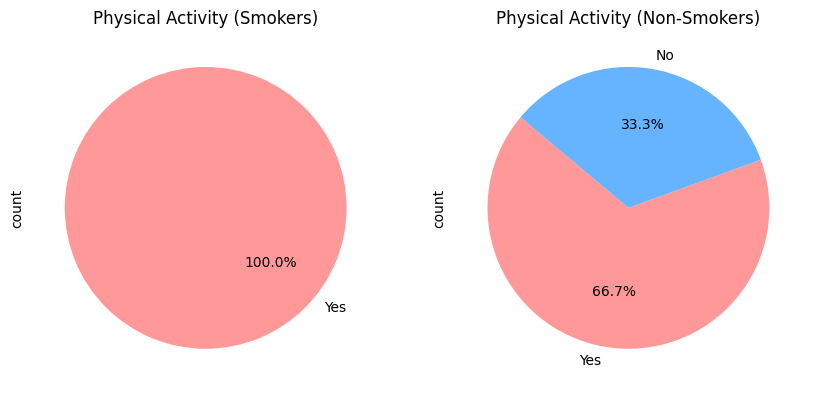

In [21]:
import pandas as pd
import matplotlib.pyplot as plt

df_dict = pd.DataFrame(heart_cleaned)

# Physical Activity distribution by Smoking status
activity_smoking = df_dict.groupby('Smoking')['Physical Activity'].value_counts()

# Plot Physical Activity by Smoking status
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
activity_smoking.loc['Yes'].plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Physical Activity (Smokers)')

plt.subplot(1, 2, 2)
activity_smoking.loc['No'].plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
plt.title('Physical Activity (Non-Smokers)')

plt.show()


OBSERVATION: Based on the data given smoking doesn't have much of an impact on the physical activeness of the smokers.

Based on the first pie graph of Physical(smokers)
- it shows that they still exercise even though they smoke

Based on the second pie pie graph the Physical Activeness of non-smokers
- It shows that some aren't active even though they don't smoke

Conclusion:
Smoking doesn't have any effect on the physical activeness of a person, It's your choice whether you are physically active or not. But in my opinion, you should quit smoking in general

2) Does BMI have any significance with Diabetes?

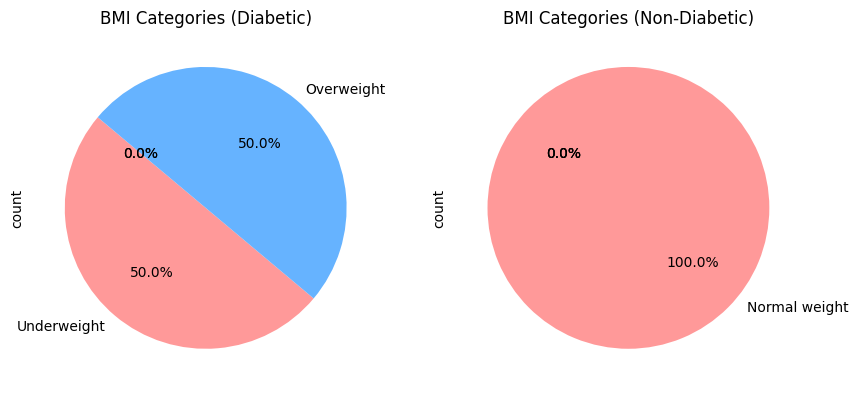

In [22]:

df_dict['BMI'] = pd.to_numeric(df_dict['BMI'])


bins = [0, 18.5, 24.9, 29.9, float('inf')]
labels = ['Underweight', 'Normal weight', 'Overweight', 'Obesity']
df_dict['BMI Category'] = pd.cut(df_dict['BMI'], bins=bins, labels=labels)

bmi_diabetic = df_dict.groupby('Diabetic')['BMI Category'].value_counts()

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
bmi_diabetic.loc['Yes'].plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
plt.title('BMI Categories (Diabetic)')

plt.subplot(1, 2, 2)
bmi_diabetic.loc['No'].plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
plt.title('BMI Categories (Non-Diabetic)')

plt.show()


OBSERVATION: Based on the data given there is a significant relationship between the BMI of a person and diabetes

Based on the first pie graph of People with diabetes
- it shows that due to diabetes they are either overweight or underweight

Based on the second pie pie graph the people with no diabetes
- It shows that they have a normal weight due to not having any diabetes.

Conclusion:
Diabetes can affect people's weight in general, we should find ways to treat and minimize the sugar level of these individuals as they're health is at risk